## LETS GROW MORE  BEGINNER LEVEL TASK 2

##Stock Market Prediction And Forecasting Using Stacked LSTM

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

##READING THE DATASET THROUGH PANDAS

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df.sample(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
331,2017-05-31,148.55,151.00,147.55,149.70,149.40,3325237,4964.89
1675,2011-12-28,88.00,89.50,86.90,87.15,87.45,460774,405.45
1300,2013-06-25,133.45,135.45,132.20,134.05,133.90,1516124,2030.31
1019,2014-08-12,151.50,154.80,151.50,154.65,154.45,1282122,1971.83
892,2015-02-23,160.95,161.50,155.30,155.50,155.95,1614558,2559.44
785,2015-07-28,137.80,138.50,136.15,137.25,137.45,1294926,1779.17
651,2016-02-11,112.70,115.80,102.40,107.00,105.25,5524328,6005.93
641,2016-02-25,107.80,108.05,102.50,107.20,106.20,9364686,9939.52
683,2015-12-28,144.90,145.25,143.45,143.85,144.05,780709,1125.27
1557,2012-06-14,108.50,109.75,105.50,105.80,105.85,946884,1017.49


In [5]:
df.shape

(2035, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


## We infer from here that there are no null values in this dataset

In [7]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


### Turnover in this period varies from 37 to 55755 lacs with a mean of 3899 Lacs

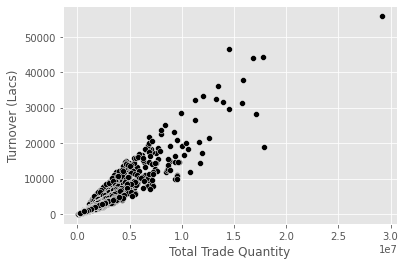

In [8]:
import seaborn as sns
from matplotlib import style
style.use("ggplot")
sns.scatterplot(x="Total Trade Quantity" , y="Turnover (Lacs)", data=df,color="black")



---



### Time to split our data into independent and dependent features

In [9]:
training=df.iloc[:, 1:2].values
training

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [10]:
from sklearn.preprocessing import MinMaxScaler as msc
scaler = msc(feature_range = (0, 1))
training_new = scaler.fit_transform(training)
training_new

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [11]:
X_train = []
y_train = []
for x in range(60, 2035):
    X_train.append(training_new[x-60:x, 0])
    y_train.append(training_new[x, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
#Making RNN sequential layer 
reg = Sequential()

#Adding the first LSTM layerand performing some dropout regularisation
reg.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
reg.add(Dropout(0.2))

In [14]:
#Adding the second LSTM layerand performing some dropout
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

In [15]:
#Adding the third LSTM layer and performing some dropout
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

In [16]:
#Adding the fourth LSTM layer and performing some dropout
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

In [17]:
#Fitting and training the data
reg.add(Dense(units = 1))

reg.compile(optimizer = 'adam', loss = 'mean_squared_error')

reg.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 31s 61ms/step - loss: 0.0224
Epoch 2/100
62/62 [==============================] - 4s 60ms/step - loss: 0.0039
Epoch 3/100
62/62 [==============================] - 4s 60ms/step - loss: 0.0026
Epoch 4/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0029
Epoch 5/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0028
Epoch 6/100
62/62 [==============================] - 4s 60ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 4s 60ms/step - loss: 0.0020
Epoch 8/100
62/62 [==============================] - 4s 60ms/step - loss: 0.0018
Epoch 9/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0023
Epoch 10/100
62/62 [==============================] - 4s 60ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0018
Epoch 12/100
62/62 [==============================] - 4s 60ms/step - loss: 0.0017
Epoch 13/100
62/62 [====

#### Testing with 2017 dataset for determining the model accuracy

In [18]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [22]:

# Getting the predicted stock price of 2017
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []

for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = reg.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

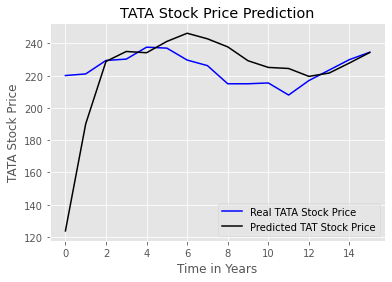

In [23]:
#plotting

plt.plot(real_stock_price, color = 'blue',label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'black',label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time in Years')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()
